# Renormalized SK Test — tutorial notebook

This notebook demonstrates a **programmatic Renormalized Spectral Kurtosis (SK) test**.

**Workflow:**
1. Run `pygsk.runtests.run_renorm_sk_test(...)` with chosen parameters.
2. Inspect the returned dictionary for key metrics (empirical vs. expected PFA, empirical d̂, etc.).
3. Plot dual histograms of raw vs. renormalized SK values using `pygsk.plot.plot_sk_dual_histogram(...)`.


In [1]:
# --- Editable parameters ---
M, N, d = 128, 64, 1.0
pfa = 1.0e-3
ns, nf = 10000, 8
mode = "noise"            # or "burst", "quiet"
assumed_N = 48
renorm_method = "median"  # or "mean", "trimmed", "mad"
FIGDIR = "_figs"
PNG_OUT = f"{FIGDIR}/nb_renorm_dual_hist.png"

import os
os.makedirs(FIGDIR, exist_ok=True)


In [2]:
# --- Imports ---
from pygsk.runtests import run_renorm_sk_test
from pygsk.plot import plot_sk_dual_histogram


In [3]:
# --- Run canonical renormalized SK test ---
result = run_renorm_sk_test(
    M=M, N=N, d=d, pfa=pfa,
    ns=ns, nf=nf, mode=mode,
    assumed_N=assumed_N,
    renorm_method=renorm_method,
    verbose=True, plot=False
)

print("\nReturned keys:", list(result.keys()))
print(f"d_empirical={result['d_empirical']:.6g}")
print(f"PFA_expected={result['pfa_expected']:.6g}  PFA_empirical(two-sided)={result['pfa_empirical']:.6g}")


[run_renorm_sk_test] d_empirical=1.32193
PFA(two-sided): empirical=0.00320513, expected=0.002

Returned keys: ['s1_map', 's2_map', 'sk_map_raw', 'sk_map_ren', 'time', 'freq_hz', 'lower_raw', 'upper_raw', 'lower_renorm', 'upper_renorm', 'below_raw', 'above_raw', 'below_renorm', 'above_renorm', 'total', 'd_empirical', 'pfa_empirical', 'pfa_expected', 'M', 'N', 'd', 'assumed_N', 'renorm_method', 'sim']
d_empirical=1.32193
PFA_expected=0.002  PFA_empirical(two-sided)=0.00320513


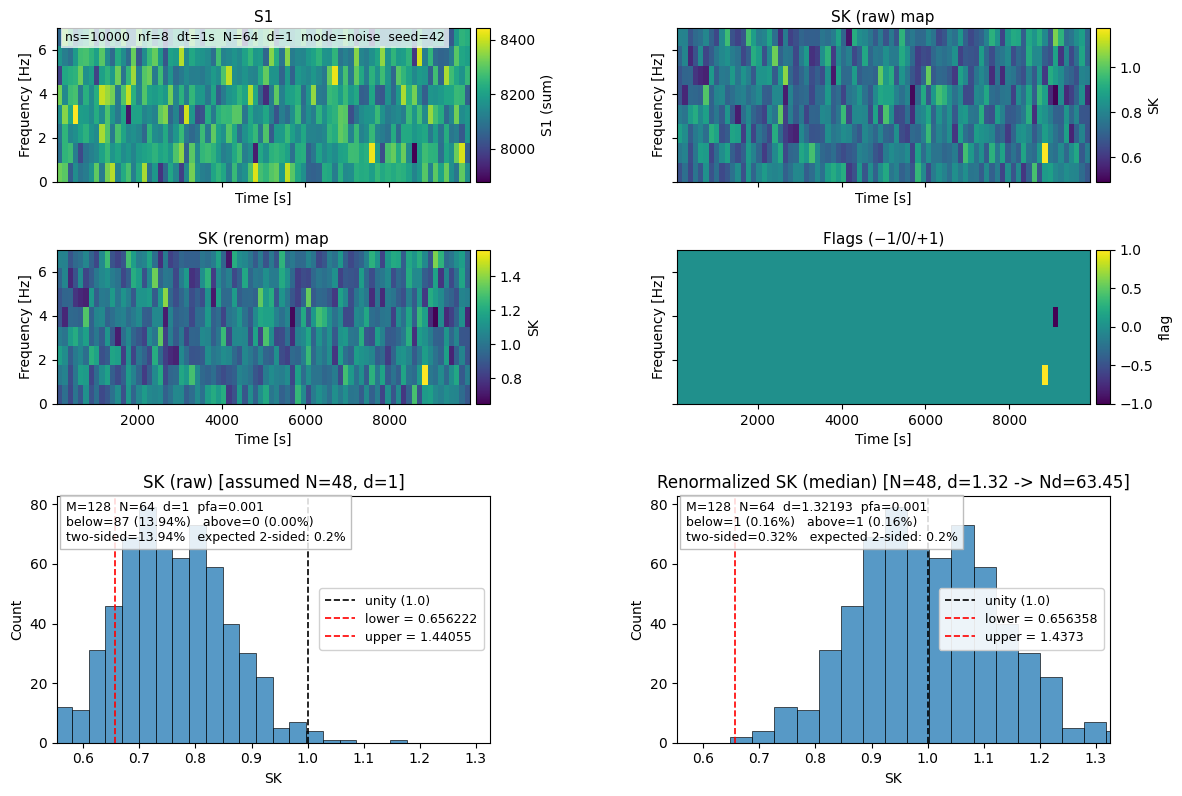

Saved _figs/nb_renorm_dual_hist.png


In [4]:
# --- Plot dual histogram (raw vs renormalized) ---
plot_sk_dual_histogram(
    result,
    show=True,
    save_path=PNG_OUT,
    no_context=False,
    log_x=False,
    log_bins=False,
)
print(f"Saved {PNG_OUT}")
